## Cox Proportional Hazard model

#### The same as survival regression

In [1]:
import pandas as pd
from lifelines import CoxPHFitter

cox = CoxPHFitter()

In [2]:
df = pd.read_excel('../data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx', error_bad_lines=False)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Convert to one-hot

In [3]:
df_subset = df.loc[:, ['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_one_hot = pd.get_dummies(df_subset, drop_first=True)
df_one_hot.head(3)

,tenure,MonthlyCharges,SeniorCitizen,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,29.85,0,0,0,1,0,0,0,0
1,34,56.95,0,0,1,0,0,1,0,0
2,2,53.85,0,1,1,0,0,1,0,0


In [4]:
cox.fit(df=df_one_hot, duration_col='tenure', event_col='Churn_Yes')
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'tenure'
         event col = 'Churn_Yes'
number of subjects = 7043
  number of events = 1869
    log-likelihood = -15182.39
  time fit was run = 2019-05-08 09:57:45 UTC

---
                                 coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MonthlyCharges                  -0.01      0.99      0.00  -6.13 <0.005     30.06       -0.01       -0.01
SeniorCitizen                    0.40      1.49      0.06   7.16 <0.005     40.15        0.29        0.50
gender_Male                     -0.01      0.99      0.05  -0.23   0.82      0.29       -0.10        0.08
Partner_Yes                     -0.81      0.45      0.05 -14.93 <0.005    164.98       -0.92       -0.70
Dependents_Yes                  -0.36      0.70      0.07  -5.21 <0.005     22.37       -0.49       -0.22
PhoneService_Yes                 0.69      2.00      0.10   6.65 <0.005     34.96        0.49     

In [5]:
cox.plot();

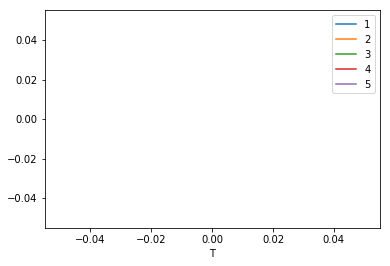

In [14]:
cox.predict_survival_function(df_one_hot.iloc[1:6, 2:]).plot();